<a href="https://colab.research.google.com/github/fateme-karami/online-retail-predict/blob/main/online_retail_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('/online_retail.csv')

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [12]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


#پیش پردازش داده

#Correct data type

In [13]:
# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID column to object data type
df['CustomerID'] = df['CustomerID'].astype('object')

#Drop null data

In [14]:
# حذف داده‌های گمشده
df = df.dropna()
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#Filter negative data

In [ ]:
# تبدیل ویژگی‌های مربوط به مقدار خرید و قیمت
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Filter the DataFrame to keep only rows where the 'Quantity' , 'UnitPrice' column has positive values
df[df['Quantity'] > 0]
df[df['UnitPrice'] > 0]
df.describe(include = 'all').T


# نمایش اطلاعات اولیه دیتاست
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB
None


#Data Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis
import numpy as np
from sklearn.preprocessing import StandardScaler

# انتخاب ویژگی‌های عددی
features = ['Quantity', 'UnitPrice', 'TotalAmount']
X = df[features]

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# اجرای تحلیل عاملی
fa = FactorAnalysis(n_components=2)  # تعیین تعداد عوامل
X_factors = fa.fit_transform(X_scaled)

# نمایش عوامل استخراج شده
print(X_factors[:5])


[[ 0.01806989 -0.01747917]
 [ 0.01210379 -0.01958922]
 [ 0.00611401 -0.02122883]
 [ 0.01210379 -0.01958922]
 [ 0.01210379 -0.01958922]]


#Clustering

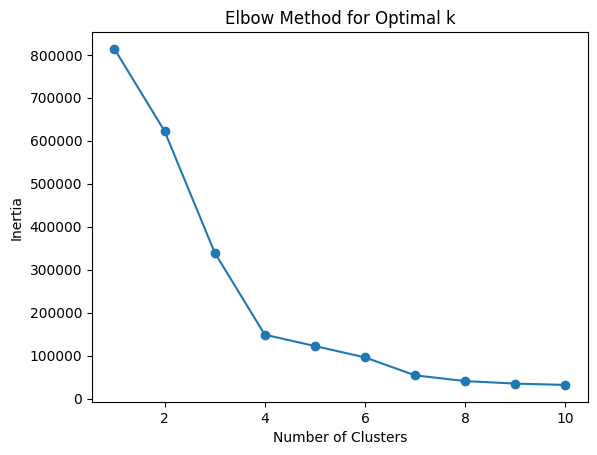

Optimal number of clusters: 4
        Cluster  Quantity  UnitPrice  TotalAmount
0             0         6       2.55        15.30
1             0         6       3.39        20.34
2             0         8       2.75        22.00
3             0         6       3.39        20.34
4             0         6       3.39        20.34
...         ...       ...        ...          ...
541904        0        12       0.85        10.20
541905        0         6       2.10        12.60
541906        0         4       4.15        16.60
541907        0         4       4.15        16.60
541908        0         3       4.95        14.85

[406829 rows x 4 columns]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_factors_scaled = scaler.fit_transform(X_factors)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_factors_scaled)
    inertia.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# محاسبه مشتق اول و دوم
first_derivative = np.diff(inertia)
second_derivative = np.diff(first_derivative)

# شناسایی نقطه زانو
optimal_k = np.argmax(second_derivative) + 2  # +2 برای جبران تغییرات
print(f'Optimal number of clusters: {optimal_k}')

# اجرای K-Means با تعداد خوشه‌های مناسب
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_factors_scaled)

# اضافه کردن خوشه‌ها به دیتاست
df['Cluster'] = clusters
print(df[['Cluster', 'Quantity', 'UnitPrice', 'TotalAmount']])


In [ ]:
# محاسبه میانگین هر ویژگی برای هر خوشه

cluster_summary = df.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalAmount': 'mean'
})
#or cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

             Quantity  UnitPrice    TotalAmount
Cluster                                        
0           12.631837   3.116182      21.777521
2        77605.000000   1.560000  122826.600000
